In [0]:
from sklearn.datasets import load_wine

In [0]:
wine = load_wine()

In [0]:
wine

In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data = np.c_[wine['data'], wine['target']], columns = wine['feature_names'] + ['target'])

In [0]:
df.head()

In [0]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

random_states = 42
test_sizes = 0.3

x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_sizes, random_state = random_states)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = neighbors.KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test_scaled)

knn.score(x_test_scaled, y_test)

0.9814814814814815

In [0]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
  
  nn = neighbors.KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
  
  nn.fit(x_train_scaled, y_train)
  preds = nn.predict(x_test_scaled)
  
  test_errors[i] = np.sqrt(mean_squared_error(y_test, preds))

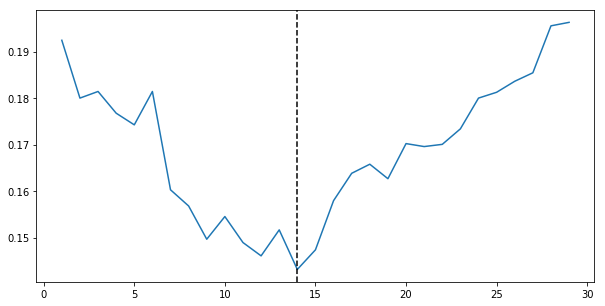

In [0]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle = '--', color = 'black');

In [0]:
optimal_k = list(ks)[np.argmin(test_errors)]

optimal_error = np.min(test_errors)

print(f'Optimal number of Neighbors: {optimal_k} Root Mean Squared Error: {optimal_error}')

Optimal number of Neighbors: 14 Root Mean Squared Error: 0.14318744883070408
